# Python数据可视化（五）：密度分布图绘制

## 使用matplotlib包绘制密度分布图

In [24]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [26]:
# Build dummy data
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
data[1:10]

[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 3.5]

In [27]:
# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data)
density.covariance_factor = lambda : .25
density._compute_covariance()

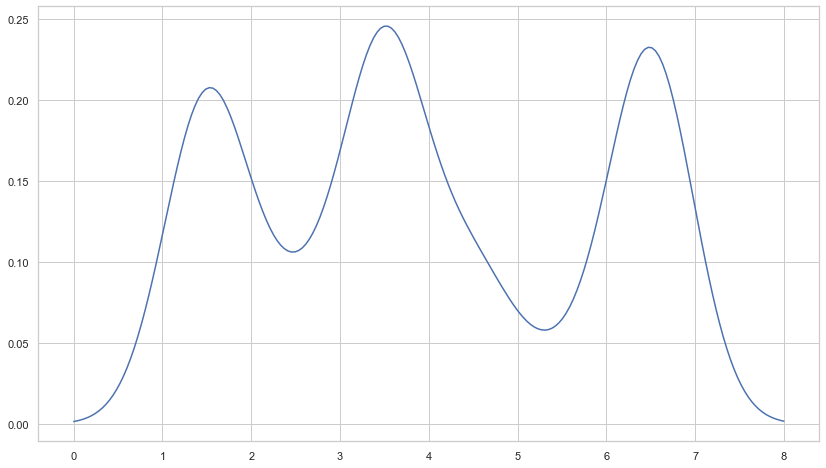

In [28]:
# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 8, 200)

# Set the figure size
plt.figure(figsize=(14, 8))

# Make the chart
# We're actually building a line chart where x values are set all along the axis and y value are
# the corresponding values from the density function
plt.plot(xs,density(xs))
plt.show()

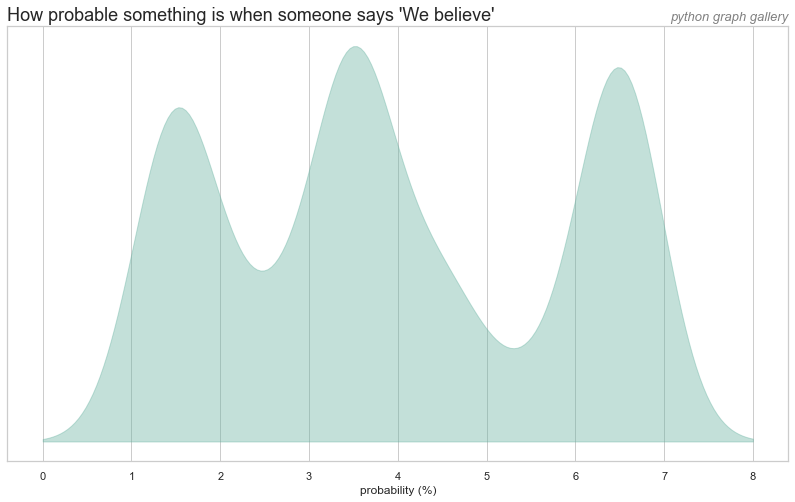

In [29]:
# Set the figure size
plt.figure(figsize=(14,8))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.title("How probable something is when someone says 'We believe'", loc='left', fontsize=18)
plt.title("python graph gallery", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("probability (%)")

# Remove Y axis
plt.yticks([])

plt.show()

## 使用seaborn包绘制密度分布图

In [1]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

In [2]:
# 加载示例数据集
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


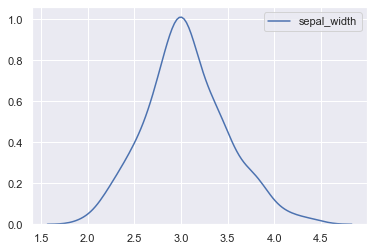

In [3]:
# 使用kdeplot函数绘制密度分布图
# Make default density plot
sns.kdeplot(df['sepal_width'])
plt.show()

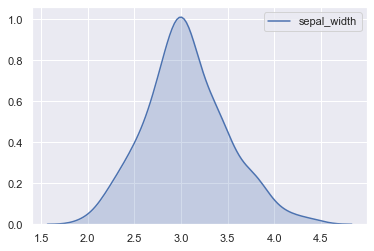

In [4]:
# 设置shade=True参数添加阴影
# density plot with shaded area with kdeplot 'shade' parameter
sns.kdeplot(df['sepal_width'], shade=True)
plt.show()

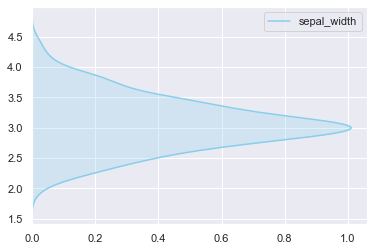

In [5]:
# 设置vertical=True参数水平放置
# setting 'vertical' parameter to True
sns.kdeplot(df['sepal_width'], shade=True, vertical=True, color="skyblue")
plt.show()

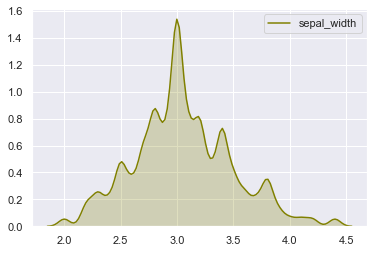

In [6]:
# 设置bw参数更改bandwidth
# Large bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=0.05, color="olive")
plt.show()

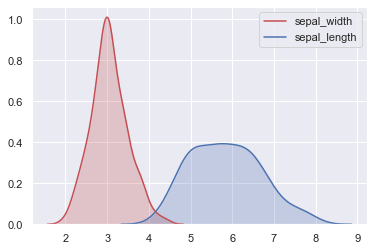

In [7]:
# 绘制多个变量的密度分布图
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.show()

In [33]:
# 绘制镜像对象密度分布图
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

df.head()

,var1,var2
0,1.188681,-0.885048
1,-0.481081,0.464484
2,-0.216836,-1.629883
3,-1.329591,-3.137911
4,-0.390510,-1.281925


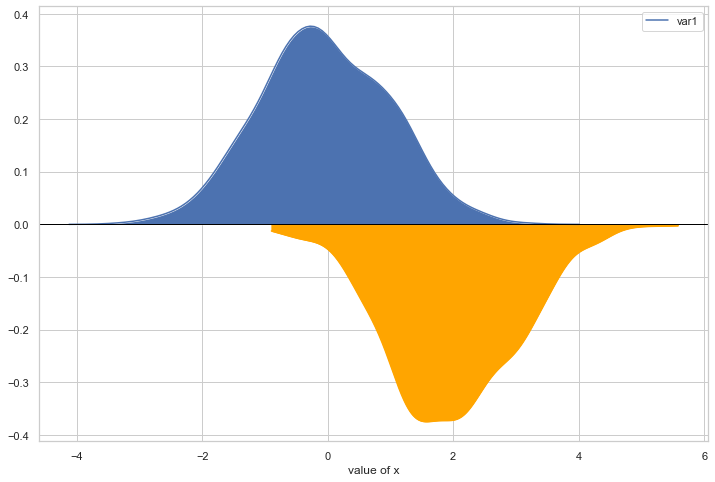

In [34]:
# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(df["var1"], shade=True, alpha=1)

# plot density chart for var2
kde = gaussian_kde(df.var2)
x_range = linspace(min(df.var2), max(df.var2), len(df.var2))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange')

# add axis names        
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')

# show the graph
plt.show()

### 参考来源：https://www.python-graph-gallery.com/density-plot/